In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
#Rutes
OUTPUT_PATH = "../Outputs/"

In [5]:
# Use preprocessed data
df = pd.read_csv(OUTPUT_PATH + "features_clean_30sec.csv")

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988,blues
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421,blues
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954,blues
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508,blues
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287,blues


In [7]:
#Use only the numeric characteristics
X = df.drop(columns=['label'])

In [ ]:
#PCA Reduction for visualize
#Reduce it for only 2 principal components 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Varianza explicada total:  {sum(pca.explained_variance_ratio_):.2f}")


Varianza explicada total:  0.40


In [10]:
#Apply K-means (clustering)
kmeans = KMeans(n_clusters = 10, random_state = 42)
df['cluster'] = kmeans.fit_predict(X)\

df[['label', 'cluster']].head()

,label,cluster
0,blues,8
1,blues,3
2,blues,8
3,blues,5
4,blues,5


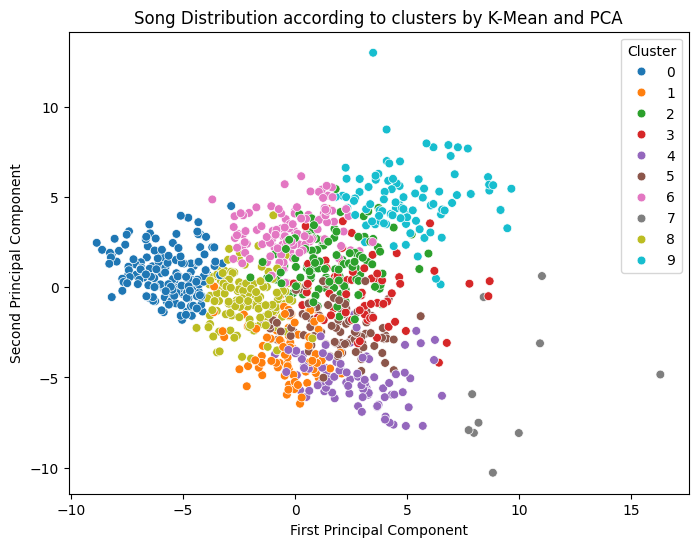

In [15]:
#Visualice data with PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette = 'tab10', s=40)
plt.title("Song Distribution according to clusters by K-Mean and PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title = 'Cluster')
plt.show()

Text(0.5, 1.0, 'Elbow Method to determine optimal k')

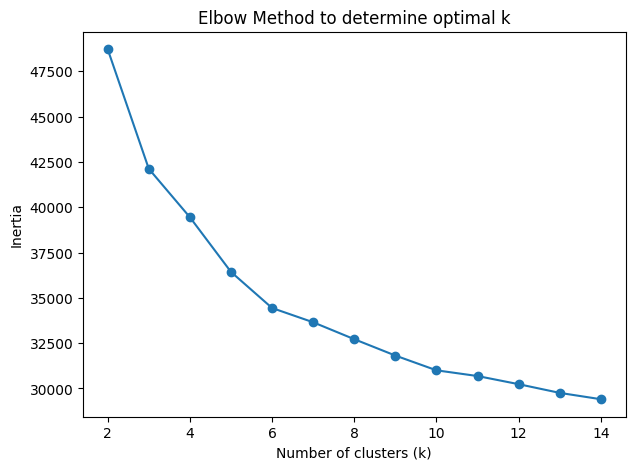

In [16]:
#Evaluate how many clusters are optimal (Elbow Method)
inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(7, 5))
plt.plot(K, inertia, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to determine optimal k")


=== Genre Distribution by Clusters ===
cluster     0   1   2   3   4   5   6  7   8   9
label                                           
blues      23   3   0   3   5  42   0  0  24   0
classical   0  42   0   1  51   1   0  3   2   0
country     6   8  18   5   3  27  11  0  21   1
disco      20   0  14   4   1   0  32  0  29   0
hiphop      8   0  17  18   0   1   9  0  19  28
jazz        3  29   8   0  23   4  15  3  14   1
metal      87   0   1   1   0   0   1  0  10   0
pop         0   0  16   1   2   0  27  4   0  50
reggae      2   3  27  30   1  12   2  0   6  17
rock       31   3  16   4   1   6  17  0  22   0


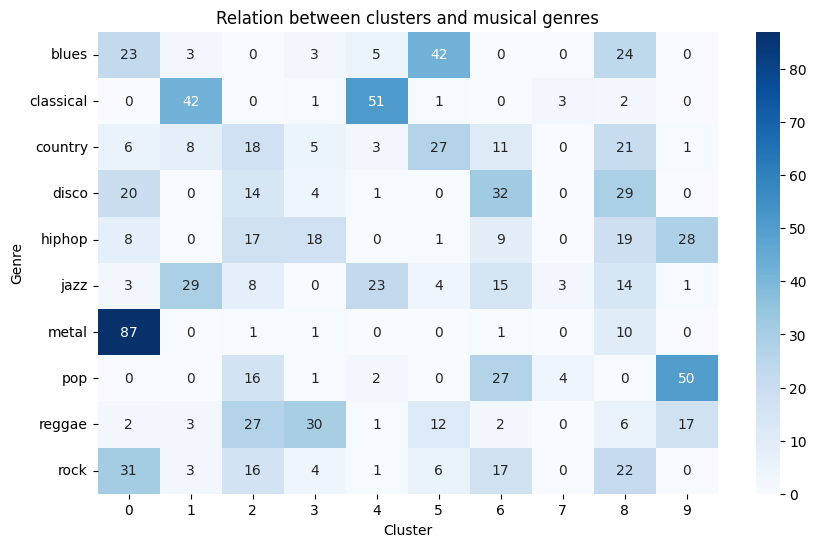

In [19]:
#View comparision between clusters and real genres
#Count how many songs of each genre there are in each cluster
cluster_composition = pd.crosstab(df['label'], df['cluster'])
print("\n=== Genre Distribution by Clusters ===")
print(cluster_composition)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_composition, cmap="Blues", annot=True, fmt='d')
plt.title("Relation between clusters and musical genres")
plt.xlabel("Cluster")
plt.ylabel("Genre")
plt.show()

In [20]:
#Save results
df.to_csv(OUTPUT_PATH + "features_clustered.csv", index = False)